In [227]:
# library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os

def pca(data, pc_count = None):
    
    # standardization
    data -= np.mean(data, 0)
    
    # calculate covariance matrix
    C = np.dot(data.T, data) / data.shape[0]
    
    # calculate eigen value and vector
    E, V = np.linalg.eigh(C)
    
    # find pca_conut the eigen vectors with the highest eigen values
    key = np.argsort(E)[::-1][:pc_count]
    E, V = E[key], V[:,key]
    
    # calculate result
    U = np.dot(data, V)
    
    return U, E, V

In [228]:
# plot digit distribution 
def plot_distribution(pca_data):
    fig = plt.figure(figsize = (16,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    ax.scatter(pca_data[:,0], pca_data[:,1])
    ax.grid()

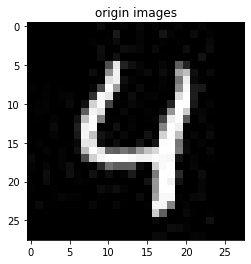

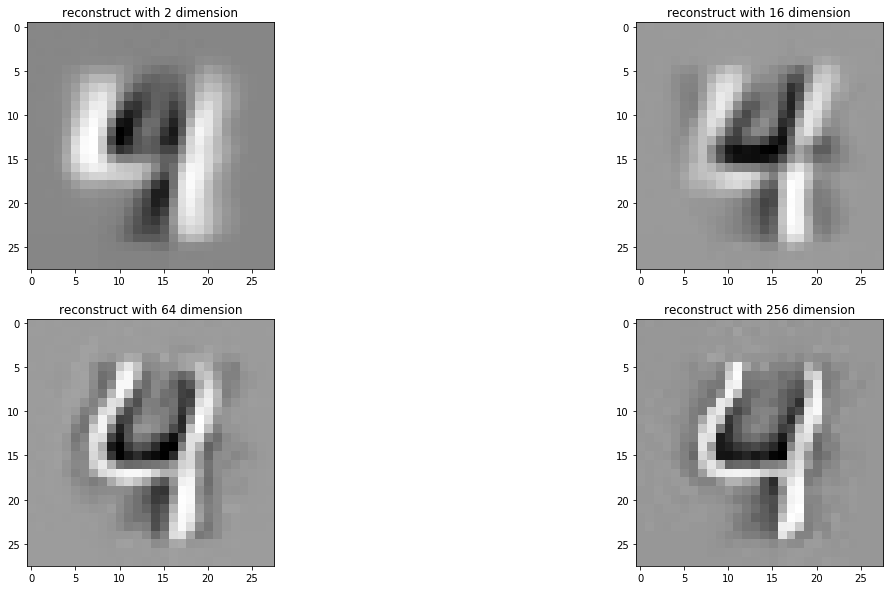

In [229]:
if __name__ == '__main__':
    
    # load data
    lena = []
    for i in range(740):
        if(os.path.isfile('pca_dataset/four{0}.jpg'.format(i))):
            data = mpimg.imread('pca_dataset/four{0}.jpg'.format(i))/255
            lena.append(data.reshape(1,-1))
    
    # data.shape (713,784)
    data = np.squeeze(np.array(lena))
    
    # show origin picture
    plt.title('origin images')
    plt.imshow(data[0,:].reshape(28,28), cmap='Greys_r')

    fig , ax = plt.subplots(figsize = (20,10))
    dimension = [2, 16, 64, 256]

    # pca with different dimension and reconstruct
    for i, d in enumerate(dimension):
        
        pca_result,_ ,vector = pca(data,d)
        recon = np.dot(pca_result, vector.T)
        plt.subplot(2,2, i+1)
        plt.title('reconstruct with {0} dimension'.format(d))
        plt.imshow(recon[0,:].reshape(28,28), cmap='Greys_r')

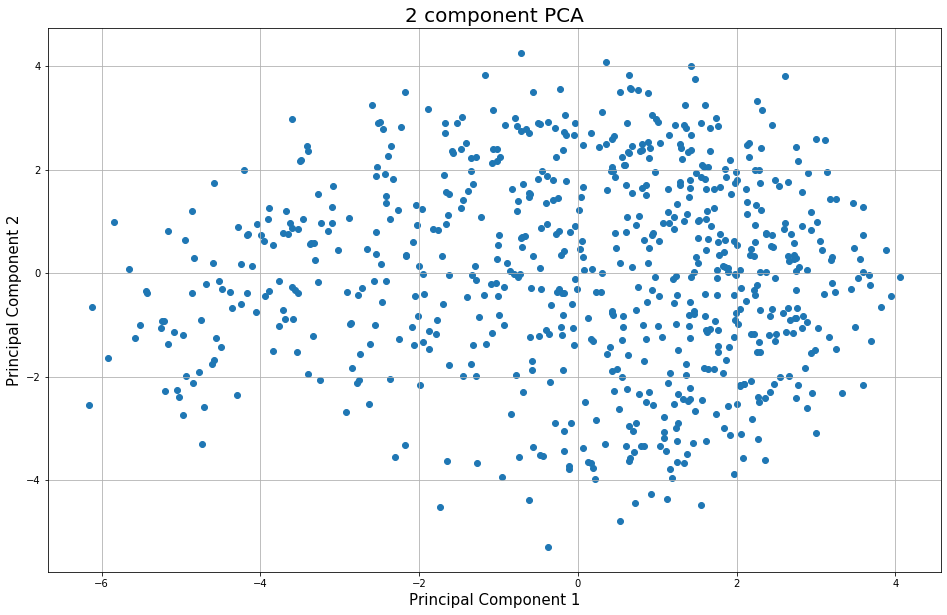

In [230]:
# pca result on digit 4
pca_2 = pca(data, 2)[0]
plot_distribution(pca_2)